In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

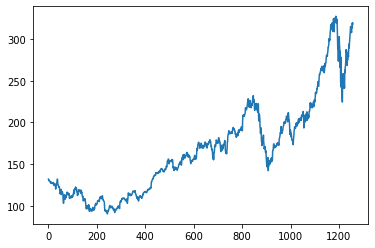

In [ ]:
plt.plot(df1)

In [ ]:
print(df.head())
print("***************************************************")
print(df1.head())

   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  

In [ ]:
# Apply min max scaller

scaler = MinMaxScaler()
df1 = np.array(df1).reshape(-1 , 1)   # we need 2d array bt this is 1d array so reshape it 
df1 = scaler.fit_transform(df1)
df1[:5]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181]])

In [ ]:
## splitting dataset into train and test split

train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size

train_set = df1[0:train_size]
test_set = df1[train_size:len(df1)]

In [ ]:
train_set.shape , test_set.shape

((817, 1), (441, 1))

In [ ]:
# ////convert the data in to x and y 


def create_dataset(data , seq_length):
  x = []
  y = []
  for i in range(len(data)-seq_length-1):
    # print(i)
    X = data[i:(seq_length+i),0]
    # print(X)
    Y = data[seq_length+i,0]
    x.append(X)
    y.append(Y)
  return np.array(x) , np.array(y)


In [ ]:
seq_length = 100
x ,y = create_dataset(df1 , seq_length)

x_train , y_train = create_dataset(train_set , seq_length)
x_test , y_test = create_dataset(test_set , seq_length)

print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(716, 100) (716,)
(340, 100) (340,)


In [ ]:
x = torch.tensor(x)
y = torch.tensor(y)
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train).to(device)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test).to(device)

print(len(x_train) ,len(y_train),len(x_test),len(y_test) )

716 716 340 340


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1).to(device)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1).to(device)

## Model


In [ ]:
class LSTM(nn.Module):
  def __init__(self , input_size , hidden_size , num_layers , num_classes , seq_length):
    super(LSTM ,self).__init__()
    self.input_size = input_size
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.num_classes = num_classes
    self.seq_length = seq_length

    self.lstm = nn.LSTM(input_size , hidden_size , num_layers , batch_first = True)
    self.fc = nn.Linear(hidden_size , num_classes)
    self.relu = nn.ReLU()

  def forward(self , x):

    h_0 = torch.zeros(self.num_layers , x.size(0) , self.hidden_size).to(device)    # tensor of size tensor[1 , 716 ,2]   num_layer = 1 , x.size = dataset size , hiddensize = 
    c_0 = torch.zeros(self.num_layers , x.size(0) , self.hidden_size).to(device)
    
    out,(hn,cn) = self.lstm(x , (h_0 , c_0))

    # hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    # out = self.relu(hn)


          # decode the hidden state of the last time step

    out = self.fc(out)
    return out 



In [ ]:
a = torch.zeros(1 , 716 , 1)
a[: , -1 , :].shape

torch.Size([1, 1])

In [ ]:
input_size = 1
hidden_size = 2 
num_classes = 1 
num_layers = 3
epoches = 500
seq_length = 100
model_lstm = LSTM(input_size , hidden_size , num_layers , num_classes , seq_length)
model_lstm.to(device)


LSTM(
  (lstm): LSTM(1, 2, num_layers=3, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model_lstm.parameters() , lr = 0.01)

In [ ]:
#  Train model 
for epoch in range(epoches):
    
    # forward pass 

    outputs = model_lstm.forward(x_train.float()).to(device)

    
    optimizer.zero_grad()

    loss = loss_func(outputs , y_train.float())

    # backward and optimize 

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epochs:{epoch+1}, , Training Loss:{loss.item()}")



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([716])) that is different to the input size (torch.Size([716, 100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epochs:1, , Training Loss:0.10100170969963074
Epochs:101, , Training Loss:0.01907009817659855
Epochs:201, , Training Loss:0.01863161101937294
Epochs:301, , Training Loss:0.018628640100359917
Epochs:401, , Training Loss:0.018628444522619247


In [ ]:
outputs.shape  , y_train.shape

(torch.Size([716, 100, 1]), torch.Size([716]))

In [22]:
#  testing model
model_lstm.eval()
test_predict = model_lstm(x_test.float())
data_predict = test_predict.data.numpy()
y_test_plot = y.data.numpy()

data_predict = data_predict[:,-1,:]

data_predict = scaler.inverse_transform(data_predict)
y_test_plot = scaler.inverse_transform(y_test_plot)

plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.plot(df1)
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [ ]:
# 